# Camoflage

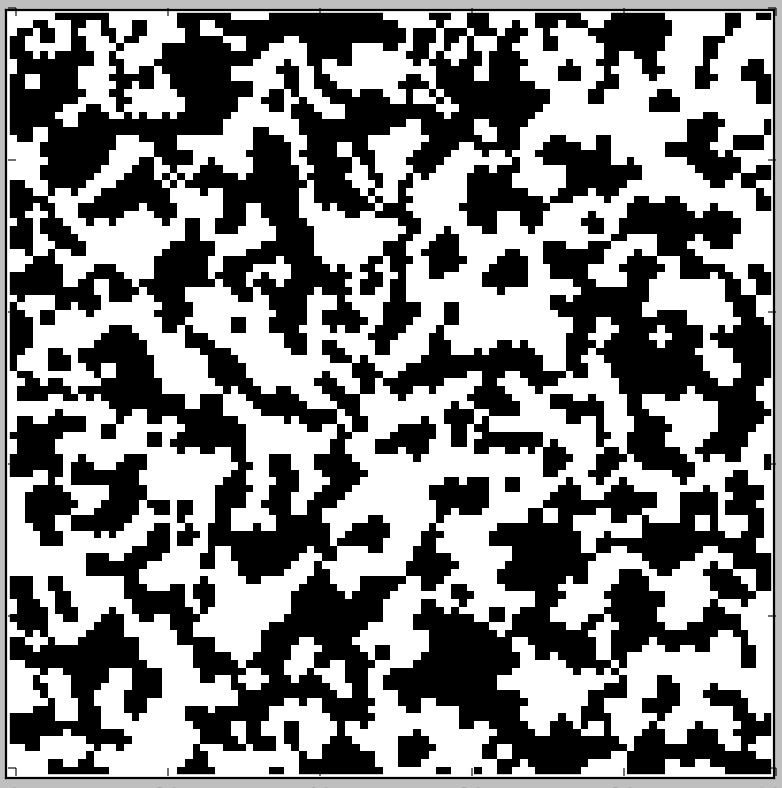

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def moore_neighbors(i, j, size, torus):
    n = []
    if torus:
        if i == 0:
            n.append((size - 1, j))
        if j == 0:
            n.append((i, size - 1))
        if i == size - 1:
            n.append((0, j))
        if j == size - 1:
            n.append((i, 0))
            
        if i == 0 and j == 0:
            n.append((size - 1, size - 1))    
        if i == 0 and j > 0:
            n.append((size - 1, j - 1))
        if i == 0 and j < size - 1:
            n.append((size - 1, j + 1))
        if j == 0 and i > 0:
            n.append((i - 1, size - 1))
        if j == 0 and i < size - 1:
            n.append((i + 1, size - 1))
        if i == size - 1 and j == size - 1:
            n.append((0, 0))
        if i == size - 1 and j > 0:
            n.append((0, j - 1))
        if i == size - 1 and j < size - 1:
            n.append((0, j + 1))
        if j == size - 1 and i > 0:
            n.append((i - 1, 0))
        if j == size - 1 and i < 0: 
            n.append((i + 1, 0))
            
        if j == 0 and i == size - 1:
            n.append((0, size - 1))
        if i == 0 and j == size - 1:
            n.append((size - 1, 0))
               
    if i > 0:
        n.append((i - 1, j))
    if j > 0:
        n.append((i, j - 1))
    if i < size - 1:
        n.append((i + 1, j))
    if j < size - 1:
        n.append((i, j + 1))
        
    if i > 0 and j > 0:
        n.append((i - 1, j - 1))
    if i < size - 1 and j < size - 1:
        n.append((i + 1, j + 1))
    if i > 0 and j < size - 1:
        n.append((i - 1, j + 1))
    if j > 0 and i < size - 1:
        n.append((i + 1, j - 1))
    
    return n


class CA():
    
    def __init__(self, size, births, survival):
        self.size = size
        self.x = np.arange(size)
        self.y = np.arange(size)
        self.cells = np.zeros((size, size))
        
        self.births = births
        self.survival = survival
        
    def pattern_setup(self, pattern):
        for p in pattern:
            self.cells[p[0] + self.size // 2, p[1] + self.size // 2] = 1
        
    def random_setup(self, d):
        
        for i in range(self.size):
            for j in range(self.size):
                if (np.random.random() < d):
                    self.cells[i, j] = 1
        
        
    def image_setup(self):
        self.plt = plt.imshow(self.cells, interpolation='nearest', 
                            origin='bottom', 
                            vmin=np.min(self.cells),
                            vmax=np.max(self.cells), 
                            cmap=plt.cm.binary)
        

    def update(self):
        newcells = np.zeros((self.size, self.size))
        for i in range(self.size):
            for j in range(self.size):
                count = 0
                neighbors = moore_neighbors(i,j, self.size, True) 
                for n in neighbors:
                    if self.cells[n[0], n[1]] == 1:
                        count += 1
                
                if self.cells[i,j] == 1 and (count in self.survival):
                    newcells[i,j] = 1
                if self.cells[i,j] == 0 and (count in self.births):
                    newcells[i,j] = 1
        self.cells = newcells
        
    def plot(self):
        self.plt.set_data(self.cells)
        return self.plt
        
size = 100
density = 0.5

sur = [3, 4, 5, 6, 7, 8]
bir = [6, 7, 8]

fig, ax = plt.subplots()
ax.set_ylim(-1, size)
ax.set_xlim(-1, size)

acorn = ((1, 2), (1, 1), (1, 0), (2, 2), (0, 1))
       
ca = CA(size, bir, sur)
ca.random_setup(density)
ca.pattern_setup(acorn)
ca.image_setup()

def update(data):
    ca.update()
    return ca.plot(),

def data_gen():
    while True: yield 1

#ani = animation.FuncAnimation(fig, update, data_gen, blit=False, interval=500)
#plt.show()

from IPython.display import Image
Image(filename='Rule 1.png', width = 500, height = 500)

Above is the result of implementing Rule 1 into this program. As you can see there is pretty uniform distribution throughout the image. However, the groupings of the cells are fairly small and don't help create the illusion of camoflage as well as other rules. 

http://stackoverflow.com/questions/32370281/how-to-include-image-or-picture-in-jupyter-notebook

Link above helped me display images inside the Ipython notebook.

### Rule 2

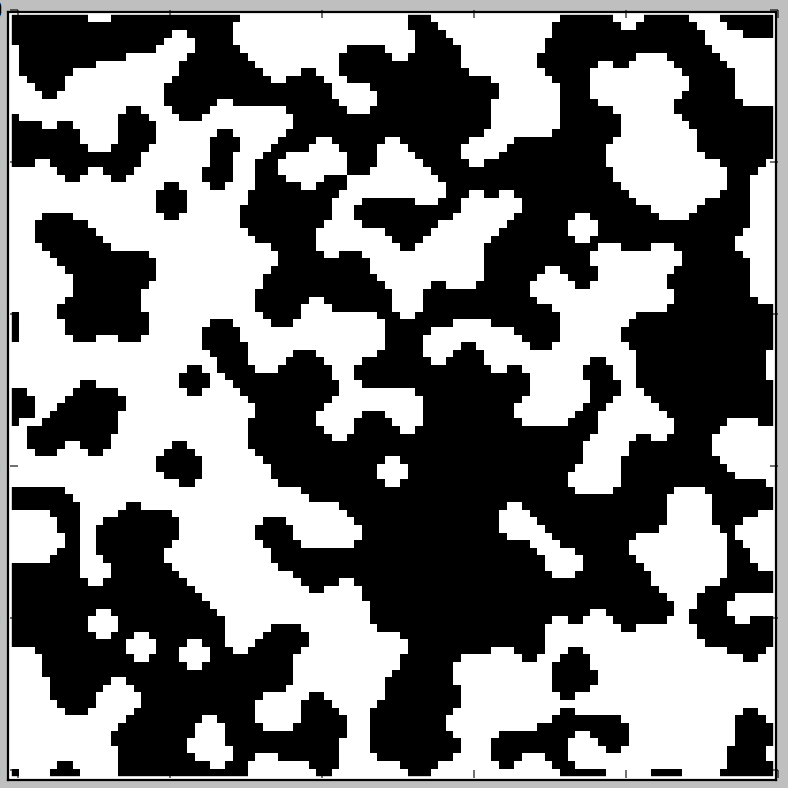

In [6]:
size = 100
density = 0.5

sur = [4, 5, 6, 7, 8]
bir = [5, 6, 7, 8]

fig, ax = plt.subplots()
ax.set_ylim(-1, size)
ax.set_xlim(-1, size)

acorn = ((1, 2), (1, 1), (1, 0), (2, 2), (0, 1))
       
ca = CA(size, bir, sur)
ca.random_setup(density)
ca.pattern_setup(acorn)
ca.image_setup()

def update(data):
    ca.update()
    return ca.plot(),

def data_gen():
    while True: yield 1

#ani = animation.FuncAnimation(fig, update, data_gen, blit=False, interval=500)
#plt.show()

Image(filename='Rule 2.png', width = 500, height = 500)

Above is a picture of the second rule. I think that this better fits the definition or description given at the begining of the problem with having 'stripes and spots'. This has large patches that have spots within them, and have stripes that streak down through the image. 

I think that this is the best model for explaining the camoflage phenomenon. 

The way that this model could potentially be extended to create directionality to the model. So if the cell has an active neighbor on opposite corner cells, or a single corner of those two, then the cell is active. Direct conrners wouln't be a necessity, you would just want some amount of directionality to ensure that the strips are more concentrated. This would help create stripes in the model. 

### Rule 3

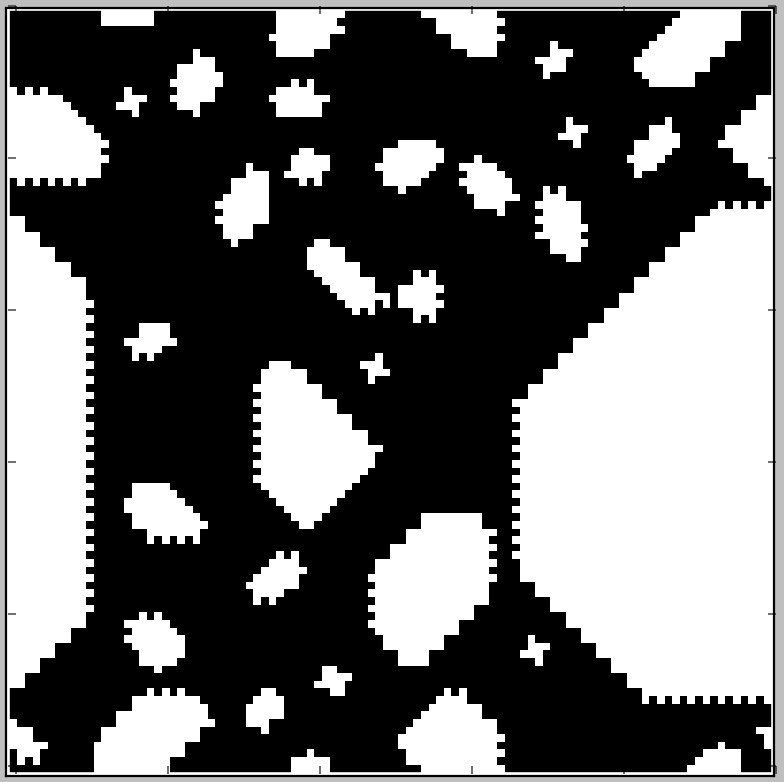

In [3]:
size = 100
density = 0.67

sur = [5, 6, 7, 8]
bir = [5, 6, 7, 8]

fig, ax = plt.subplots()
ax.set_ylim(-1, size)
ax.set_xlim(-1, size)

acorn = ((1, 2), (1, 1), (1, 0), (2, 2), (0, 1))
       
ca = CA(size, bir, sur)
ca.random_setup(density)
ca.pattern_setup(acorn)
ca.image_setup()

def update(data):
    ca.update()
    return ca.plot(),

def data_gen():
    while True: yield 1

#ani = animation.FuncAnimation(fig, update, data_gen, blit=False, interval=500)
#plt.show()

Image(filename='Rule 3.png', width = 500, height = 500)

All edge pieces in this model oscillate back and forth. This model has more spots than it does random strips an spots. Prior to reaching this state the graph shrinks a little bit because of the lack of neighbors on some of the edges. 